In [12]:
#major packages
import glob
import os 
import pickle
import sys

import numpy as np
import pandas as pd
import xarray as xr


current_path=os.getcwd()
my_git_path=current_path+"/../../"
major_work_path=my_git_path+"/../Work/GIT_Repository/"
airborne_processing_module_path=current_path+"/../src/"
airborne_data_importer_path=major_work_path+"hamp_processing_py/"+\
                                "hamp_processing_python/" # This is also the major path where your data will be stored
processing_data_plotter_path=current_path+"/../plotting/"
plot_path=current_path+"/../plots/"
sys.path.insert(1,airborne_processing_module_path)
sys.path.insert(2,processing_data_plotter_path)

from measurement_instruments_ql import HALO_Devices, RADAR, HAMP
import config_handler
campaign="HALO_AC3"

cfg=config_handler.Configuration(major_path=airborne_data_importer_path)
#####
processing_cfg_name="unified_grid_cfg"  
processing_config_file=cfg.load_config_file(processing_cfg_name)
processing_config_file["Input"]["data_path"]=processing_config_file["Input"][\
                                                "campaign_path"]+"Flight_Data/"
processing_config_file["Input"]["device_data_path"]=processing_config_file["Input"][\
                                                "data_path"]+campaign+"/"
prcs_cfg_dict=dict(processing_config_file["Input"])
#prcs_cfg_dict

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\hamp_processing_python\notebooks/../..//../Work/GIT_Repository/hamp_processing_py/hamp_processing_python//unified_grid_cfg.ini


In [13]:
flight="RF15"
plot_radar=True

In [14]:
perform_raw_quicklooks=False
perform_error_identification=False
perform_processing=False
show_processed_results=True

HALO_Devices_cls=HALO_Devices(prcs_cfg_dict)
Radar_cls=RADAR(HALO_Devices_cls)
HAMP_cls=HAMP(HALO_Devices_cls)

In [15]:
radar_ds=Radar_cls.open_version_specific_processed_radar_data(version="2.6",for_calibrated_file=True)

Look for Radar data in  C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/
C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/HALO_HALO_AC3_radar_unified_*20220408_v2*.nc
Opened specific version: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc\HALO_HALO_AC3_radar_unified_RF15_20220408_v2.6.nc


In [16]:
import halodataplot
Quick_Plotter=halodataplot.Quicklook_Plotter(prcs_cfg_dict)
Radar_Quicklook=halodataplot.Radar_Quicklook(prcs_cfg_dict)
Radiometer_Quicklook=halodataplot.Radiometer_Quicklook(prcs_cfg_dict)

In [27]:
prcs_cfg_dict

{'system': 'windows',
 'campaign': 'HALO_AC3',
 'campaign_path': 'C:\\Users\\u300737\\Desktop\\Desktop_alter_Rechner\\PhD_UHH_WIMI\\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//',
 'filenameprefix': 'HALO_AC3_HALO_',
 'save_path': 'C:\\Users\\u300737\\Desktop\\Desktop_alter_Rechner\\PhD_UHH_WIMI\\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Save_path/',
 'comment': 'Preliminary data! Uncalibrated Data. Only use for preliminary work!',
 'contact': 'henning.dorff@uni-hamburg.de',
 't1': '20220408',
 't2': '20220408',
 'date': '20220408',
 'flight_date_used': '20220408',
 'unify_grid': 'True',
 'correct_attitude': 'True',
 'fill_gaps': 'True',
 'remove_clutter': 'True',
 'remove_side_lobes': 'True',
 'remove_radiometer_errors': 'True',
 'add_radarmask': 'True',
 'add_radar_mask_values': 'True',
 'version': '2',
 'subversion': '6',
 'quicklooks': 'False',
 'missing_value': '-888',
 'fill_value': 'nan',
 'altitude_threshold': '4800',
 'roll_threshold': 

Plotting HAMP Cloud Radar (processed and calibrated)
dBZ plotted
LDR plotted
unified_radar_dbz_ldr_quicklook_RF15_20220408.png
Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\hamp_processing_python\notebooks/../plots//unified_dataset/unified_radar_dbz_ldr_quicklook_RF15_20220408.png


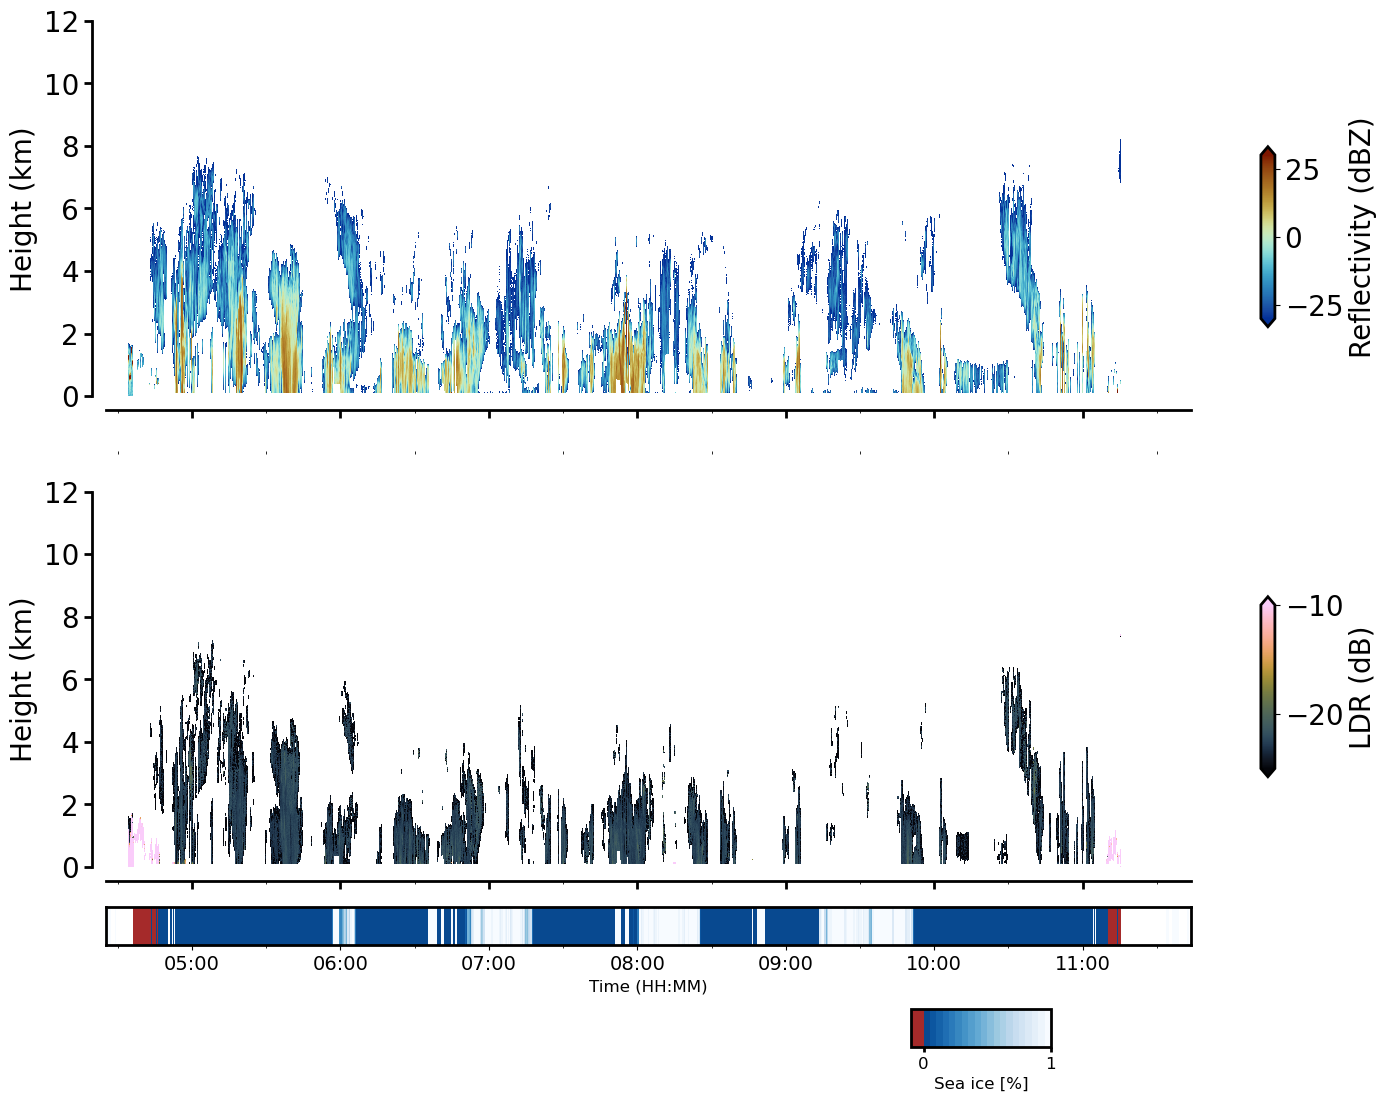

In [18]:
if plot_radar:
    Radar_Quicklook.processed_radar=radar_ds
    #radar_ds
    Radar_Quicklook.unified_radar_quicklook(flight,plot_path,calibrated_radar=True)
    #radar_ds

## Radiometer

In [19]:
HAMP_cls.open_processed_hamp_data(open_calibrated=True)
hamp_ds=HAMP_cls.calib_processed_hamp_ds
#hamp_ds

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/HALO_HALO_AC3_radiometer_unified_*20220408_v2*.nc


In [20]:
Radiometer_Quicklook.radiometer_tb_dict=hamp_ds

TBKVDF: Index(['22.24', '23.04', '23.84', '25.44', '26.24', '27.84', '31.4', '50.3',
       '51.76', '52.8', '53.75', '54.94', '56.66', '58.0'],
      dtype='object')
unified_radiometer_tb_quicklook_RF15_20220408.png
Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\hamp_processing_python\notebooks/../plots//unified_dataset/unified_radiometer_tb_quicklook_RF15_20220408.png


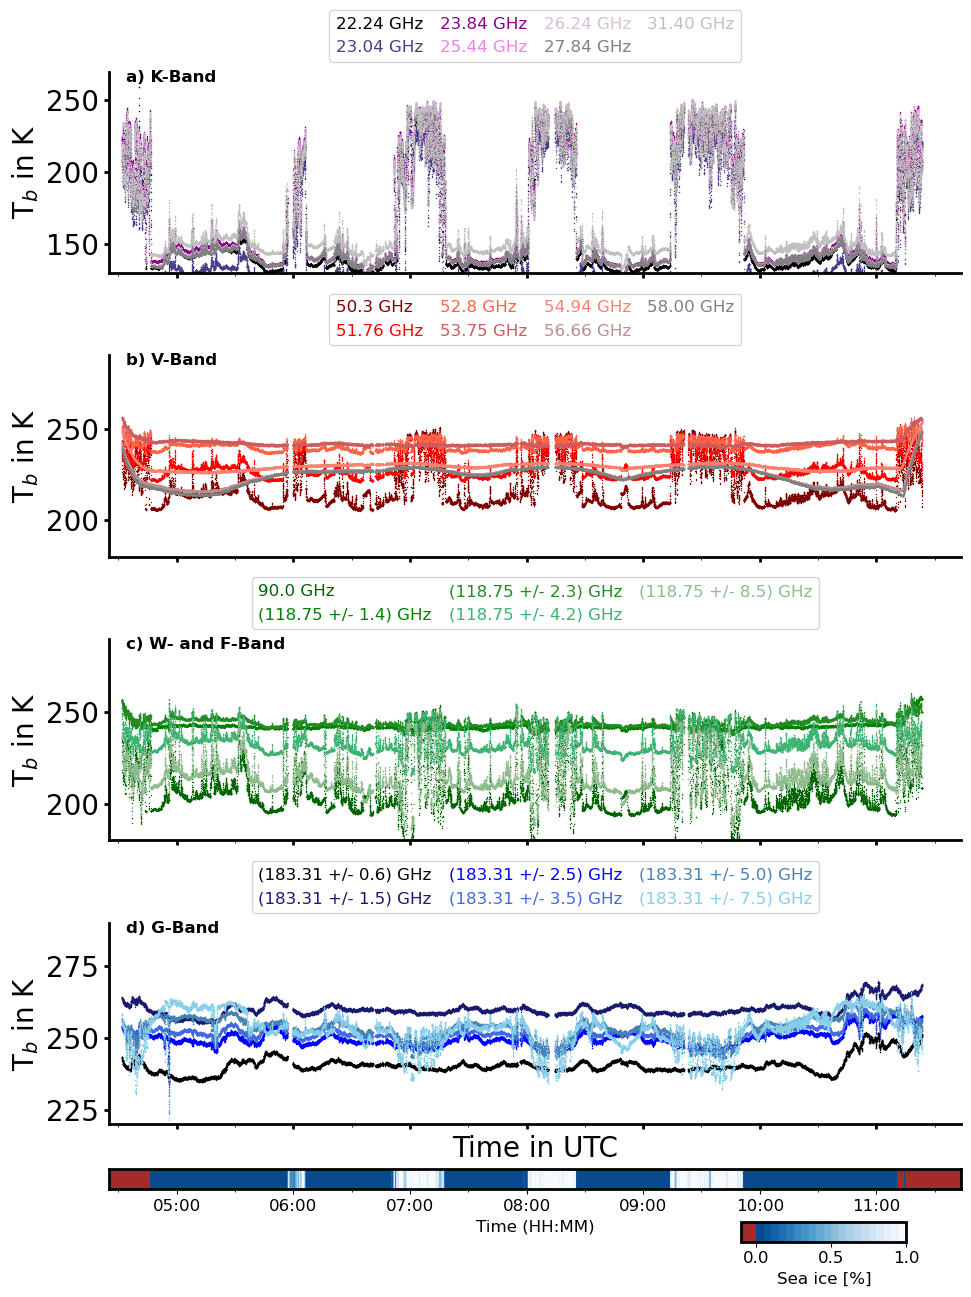

In [21]:
Radiometer_Quicklook.unified_radiometer_plot(flight,plot_path,calibrated=True)

In [23]:
# HALO-AC3 Flight dates
flight_year="2022"
flight_day={"RF01":"11",
                         "RF02":"12",
                         "RF03":"13",
                         "RF04":"14",
                         "RF05":"15",
                         "RF06":"16",
                         "RF07":"20",
                         "RF08":"21",
                         "RF09":"28",
                         "RF10":"29",
                         "RF11":"30",
                         "RF12":"01",
                         "RF13":"04",
                         "RF14":"07",
                         "RF15":"08",
                         "RF16":"10",
                         "RF17":"11",
                         "RF18":"12"}
        
flight_month={"RF01":"03",
                           "RF02":"03",
                           "RF03":"03",
                           "RF04":"03",
                           "RF05":"03",
                           "RF06":"03",
                           "RF07":"03",
                           "RF08":"03",
                           "RF09":"03",
                           "RF10":"03",
                           "RF11":"03",
                           "RF12":"04",
                           "RF13":"04",
                           "RF14":"04",
                           "RF15":"04",
                           "RF16":"04",
                           "RF17":"04",
                           "RF18":"04"}

In [44]:
for rf in [*flight_day.keys()]:
    
    date=flight_year+flight_month[rf]+flight_day[rf]
    #print( rf," flightdate:",date)
    path=airborne_data_importer_path+"//Flight_Data/HALO_AC3/all_nc/"
    hamp=xr.open_dataset(path+"HALO_HALO_AC3_radiometer_unified_"+rf+"_"+date+"_v2.6.nc")
    #print(hamp)
    print(rf," start: ",hamp.time.values[0],", end:",hamp.time.values[-1])

RF01  start:  2022-03-11T13:19:28.000000000 , end: 2022-03-11T16:22:30.000000000
RF02  start:  2022-03-12T08:22:06.000000000 , end: 2022-03-12T16:44:06.000000000
RF03  start:  2022-03-13T08:04:31.000000000 , end: 2022-03-13T16:52:49.000000000
RF04  start:  2022-03-14T08:45:34.000000000 , end: 2022-03-14T17:19:07.000000000
RF05  start:  2022-03-15T09:04:50.000000000 , end: 2022-03-15T17:46:39.000000000
RF06  start:  2022-03-16T08:58:18.000000000 , end: 2022-03-16T18:27:19.000000000
RF07  start:  2022-03-20T07:58:48.000000000 , end: 2022-03-20T17:07:04.000000000
RF08  start:  2022-03-21T08:48:45.000000000 , end: 2022-03-21T16:35:37.000000000
RF09  start:  2022-03-28T08:36:39.000000000 , end: 2022-03-28T16:06:03.000000000
RF10  start:  2022-03-29T07:53:09.000000000 , end: 2022-03-29T16:27:05.000000000
RF11  start:  2022-03-30T07:56:46.000000000 , end: 2022-03-30T16:21:07.000000000
RF12  start:  2022-04-01T07:29:57.000000000 , end: 2022-04-01T15:40:33.000000000
RF13  start:  2022-04-04T07:

In [45]:
hamp

<xarray.Dataset>
Dimensions:             (time: 29144, uniRadiometer_freq: 25)
Coordinates:
  * time                (time) datetime64[ns] 2022-04-12T07:24:21 ... 2022-04...
  * uniRadiometer_freq  (uniRadiometer_freq) float64 22.24 23.04 ... 188.3 190.8
Data variables:
    TB                  (time, uniRadiometer_freq) float64 ...
    freq                (uniRadiometer_freq) float64 ...
    interpolate_flag    (time, uniRadiometer_freq) float64 ...
    lat                 (time) float64 ...
    lon                 (time) float64 ...
    alt                 (time) float64 ...
    surface_mask        (time) float64 ...
Attributes: (12/13)
    title:                 HAMP measurements on HALO Aircraft duringHALO_AC3
    institute:             Meteorological Institute, Universitaet Hamburg; Ma...
    contact:               henning.dorff@uni-hamburg.de
    source:                HAMP ['radiometer']
    flight_date:           20220412
    flight_number:         RF18
    ...                    ...
    comment:               Preliminary Calibrated data. Still use with caution.
    conventions:           CF-1.6 where applicable
    processing_date:       28/09/2023 16:39:51
    authors:               Dorff, Henning; Ewald, Florian; Hirsch, Lutz;Janse...
    licence:               Creative Commons Attribution NonCommercialShareAli...
    performed_processing:  Gaps filled. Strong flight manoeuvers removed. Rad...